In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload your CSV
from google.colab import files
uploaded = files.upload()  # Pick your CSV file here

Saving label.csv to label (1).csv


In [ ]:
# Load the CSV
df = pd.read_csv('label.csv')  # replace with your filename

In [ ]:
df.drop(columns=["Sum of concentrations"], inplace=True)

In [ ]:
df.drop(columns=['ID'], inplace=True)

In [ ]:
df.head()

,Starch/SUM(%),Protein/SUM(%),Vitamin C/SUM(%),MgSO4/SUM(%)
0,32.984,1.047,25.654,40.314
1,23.585,37.736,28.774,9.906
2,39.320,23.301,1.942,35.437
3,24.664,16.592,32.287,26.457
4,4.878,13.415,40.244,41.463


   Starch/SUM(%)  Protein/SUM(%)  Vitamin C/SUM(%)  MgSO4/SUM(%)
0         32.984           1.047            25.654        40.314
1         23.585          37.736            28.774         9.906
2         39.320          23.301             1.942        35.437
3         24.664          16.592            32.287        26.457
4          4.878          13.415            40.244        41.463
                  Starch/SUM(%)  Protein/SUM(%)  Vitamin C/SUM(%)  \
Starch/SUM(%)          1.000000       -0.345601         -0.421695   
Protein/SUM(%)        -0.345601        1.000000         -0.297207   
Vitamin C/SUM(%)      -0.421695       -0.297207          1.000000   
MgSO4/SUM(%)          -0.321005       -0.348334         -0.261322   

                  MgSO4/SUM(%)  
Starch/SUM(%)        -0.321005  
Protein/SUM(%)       -0.348334  
Vitamin C/SUM(%)     -0.261322  
MgSO4/SUM(%)          1.000000  


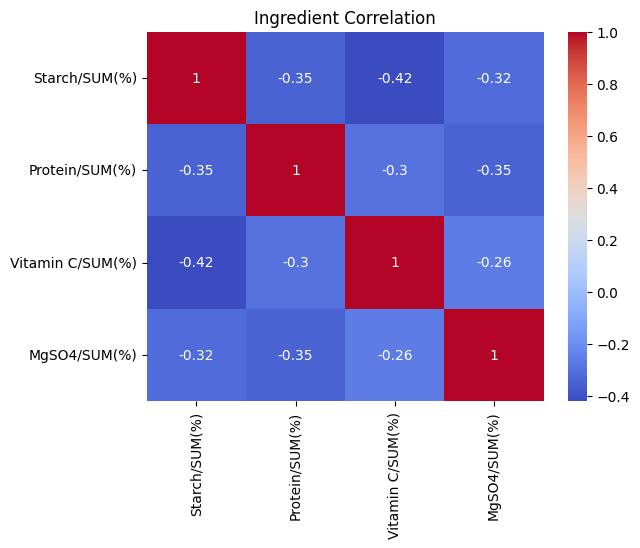

In [ ]:
# Display first few rows
print(df.head())

# Show correlation matrix
corr = df.corr()
print(corr)

# Optional: plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Ingredient Correlation')
plt.show()

             Starch   Protein  Vitamin C     MgSO4
Starch     1.000000  0.257441  -0.190039  0.104989
Protein    0.257441  1.000000  -0.094235 -0.027329
Vitamin C -0.190039 -0.094235   1.000000  0.158273
MgSO4      0.104989 -0.027329   0.158273  1.000000


<Axes: >

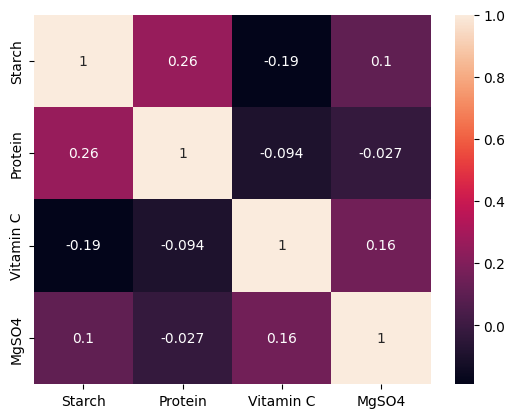

In [ ]:
import pandas as pd
import numpy as np

# Simulate your current ingredient range
ingredient_cols = ['Starch', 'Protein', 'Vitamin C', 'MgSO4']
ranges = {
    'Starch': (0, 10),
    'Protein': (0, 10),
    'Vitamin C': (0, 10),
    'MgSO4': (0, 10)
}

n_samples = 20  # number of new mixtures

# Generate LHS manually
lhs_manual = np.zeros((n_samples, len(ingredient_cols)))

for i, (col, (min_val, max_val)) in enumerate(ranges.items()):
    intervals = np.linspace(min_val, max_val, n_samples, endpoint=False)
    step = (max_val - min_val) / n_samples
    values = intervals + np.random.rand(n_samples) * step
    np.random.shuffle(values)
    lhs_manual[:, i] = values

df_lhs = pd.DataFrame(lhs_manual, columns=ingredient_cols)
# df_lhs['Sum of concentrations'] = df_lhs.sum(axis=1)

# Check correlation
print(df_lhs.corr())

# Save the new set
df_lhs.to_csv("lhs_generated.csv", index=False)
sns.heatmap(df_lhs.corr(), annot=True)


🔁 Iteration 1 — Correlation Heatmap:


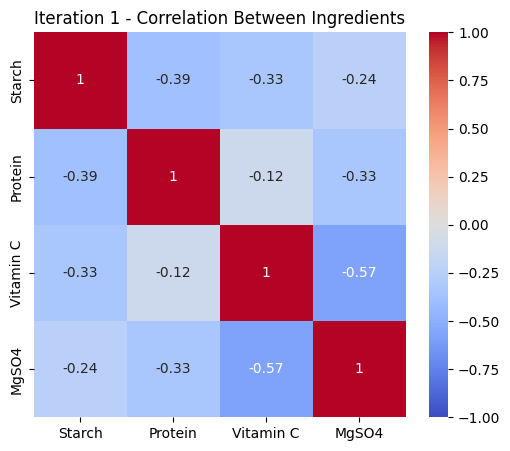


🔁 Iteration 2 — Correlation Heatmap:


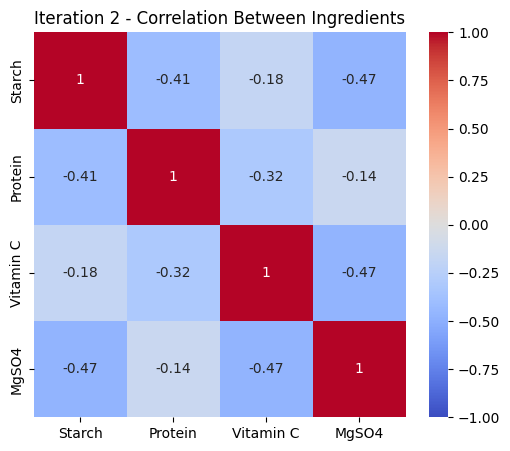


🔁 Iteration 3 — Correlation Heatmap:


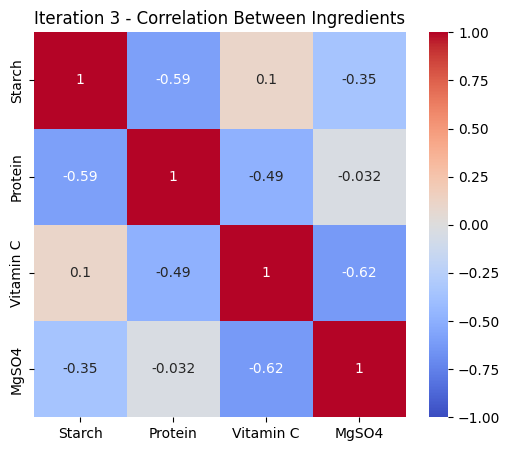


🔁 Iteration 4 — Correlation Heatmap:


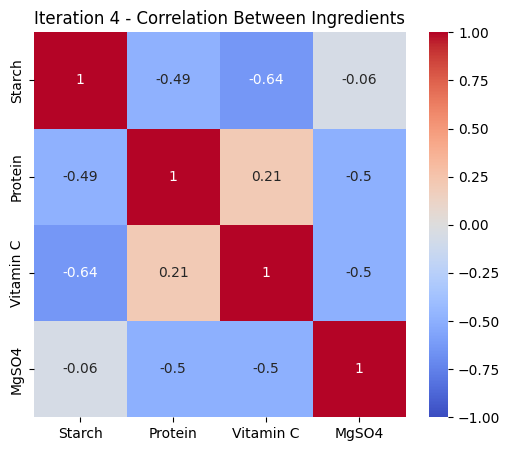


🔁 Iteration 5 — Correlation Heatmap:


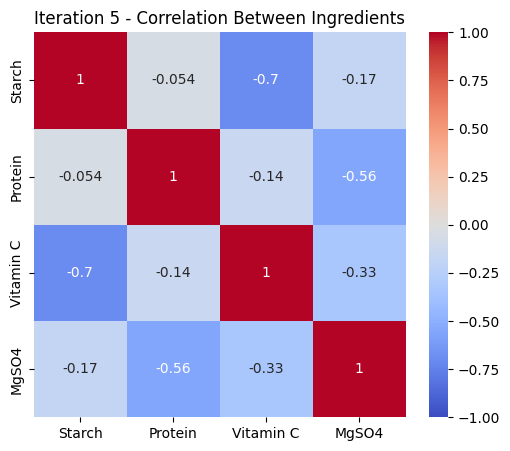

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set number of samples and iterations
n_samples = 20
n_iterations = 5

# Ingredient setup
ingredient_cols = ['Starch', 'Protein', 'Vitamin C', 'MgSO4']
ranges = {
    'Starch': (0, 10),
    'Protein': (0, 10),
    'Vitamin C': (0, 10),
    'MgSO4': (0, 10)
}

for iteration in range(n_iterations):
    # Manual LHS-like sampling
    lhs_manual = np.zeros((n_samples, len(ingredient_cols)))

    for i, (col, (min_val, max_val)) in enumerate(ranges.items()):
        intervals = np.linspace(min_val, max_val, n_samples, endpoint=False)
        step = (max_val - min_val) / n_samples
        values = intervals + np.random.rand(n_samples) * step
        np.random.shuffle(values)
        lhs_manual[:, i] = values

    # Create DataFrame and normalize to 100%
    df = pd.DataFrame(lhs_manual, columns=ingredient_cols)
    df_percent = df.div(df.sum(axis=1), axis=0) * 100

    # Compute correlation
    corr = df_percent.corr()

    # Plot heatmap
    print(f"\n🔁 Iteration {iteration + 1} — Correlation Heatmap:")
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Iteration {iteration + 1} - Correlation Between Ingredients")
    plt.show()


Iteration 1: Average absolute correlation = 0.3750
Iteration 2: Average absolute correlation = 0.3267
Iteration 3: Average absolute correlation = 0.3302
Iteration 4: Average absolute correlation = 0.3292
Iteration 5: Average absolute correlation = 0.3925
Iteration 6: Average absolute correlation = 0.3260
Iteration 7: Average absolute correlation = 0.3316
Iteration 8: Average absolute correlation = 0.3306
Iteration 9: Average absolute correlation = 0.3313
Iteration 10: Average absolute correlation = 0.3778
Iteration 11: Average absolute correlation = 0.3241
Iteration 12: Average absolute correlation = 0.3279
Iteration 13: Average absolute correlation = 0.3238
Iteration 14: Average absolute correlation = 0.3246
Iteration 15: Average absolute correlation = 0.3224
Iteration 16: Average absolute correlation = 0.3460
Iteration 17: Average absolute correlation = 0.3213
Iteration 18: Average absolute correlation = 0.3316
Iteration 19: Average absolute correlation = 0.3258
Iteration 20: Average

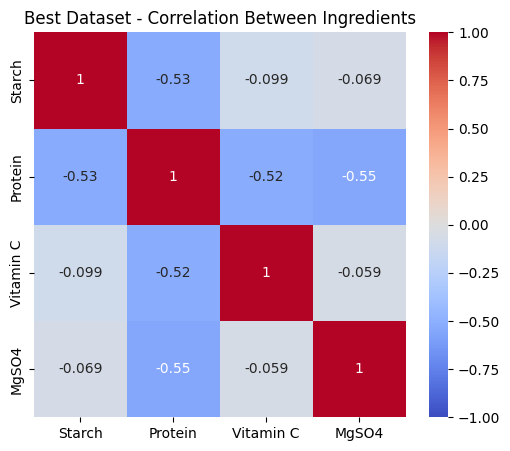

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def run_lhs_and_pick_best(n_samples=20, n_iterations=10):
    ingredient_cols = ['Starch', 'Protein', 'Vitamin C', 'MgSO4']
    ranges = {col: (0, 10) for col in ingredient_cols}

    best_score = float('inf')
    best_corr = None
    best_df_percent = None

    for iteration in range(n_iterations):
        # LHS-like manual sampling
        lhs_manual = np.zeros((n_samples, len(ingredient_cols)))

        for i, (col, (min_val, max_val)) in enumerate(ranges.items()):
            intervals = np.linspace(min_val, max_val, n_samples, endpoint=False)
            step = (max_val - min_val) / n_samples
            values = intervals + np.random.rand(n_samples) * step
            np.random.shuffle(values)
            lhs_manual[:, i] = values

        # Normalize to 100%
        df = pd.DataFrame(lhs_manual, columns=ingredient_cols)
        df_percent = df.div(df.sum(axis=1), axis=0) * 100

        # Compute correlation
        corr = df_percent.corr()

        # Score: average of absolute correlations off-diagonal
        corr_score = (corr.where(~np.eye(corr.shape[0],dtype=bool))
                          .abs().sum().sum()) / (len(ingredient_cols)**2 - len(ingredient_cols))

        print(f"Iteration {iteration+1}: Average absolute correlation = {corr_score:.4f}")

        # Track best
        if corr_score < best_score:
            best_score = corr_score
            best_corr = corr
            best_df_percent = df_percent.copy()

    # Show the best result
    print(f"\n✅ Best correlation score: {best_score:.4f}")
    plt.figure(figsize=(6, 5))
    sns.heatmap(best_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Best Dataset - Correlation Between Ingredients")
    plt.show()

    return best_df_percent  # return the dataset you can use or save

# 🔽 Call it with desired number of iterations:
best_dataset = run_lhs_and_pick_best(n_samples=20, n_iterations=1000)

# To save the best dataset to CSV:
best_dataset.to_csv(f"best_lhs_ingredient_mixture{cont}.csv", index=False)



✅ Best correlation score: 0.2994


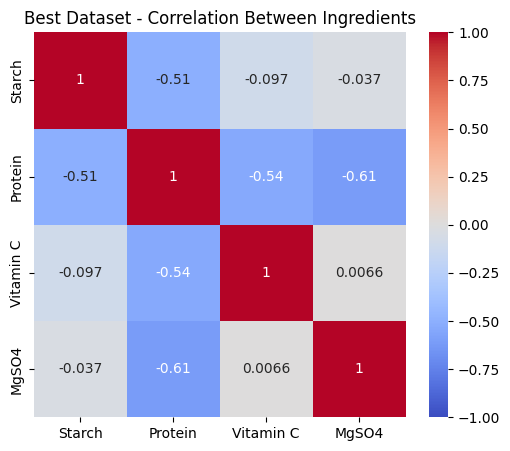

✅ Saved as: best_lhs_ingredient_mixture_13.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

def get_next_filename(base_name="best_lhs_ingredient_mixture", extension=".csv"):
    counter = 1
    while True:
        filename = f"{base_name}_{counter}{extension}"
        if not os.path.exists(filename):
            return filename
        counter += 1

def run_lhs_and_pick_best(n_samples=20, n_iterations=10):
    ingredient_cols = ['Starch', 'Protein', 'Vitamin C', 'MgSO4']
    ranges = {col: (0, 10) for col in ingredient_cols}

    best_score = float('inf')
    best_corr = None
    best_df_percent = None

    for iteration in range(n_iterations):
        lhs_manual = np.zeros((n_samples, len(ingredient_cols)))

        for i, (col, (min_val, max_val)) in enumerate(ranges.items()):
            intervals = np.linspace(min_val, max_val, n_samples, endpoint=False)
            step = (max_val - min_val) / n_samples
            values = intervals + np.random.rand(n_samples) * step
            np.random.shuffle(values)
            lhs_manual[:, i] = values

        df = pd.DataFrame(lhs_manual, columns=ingredient_cols)
        df_percent = df.div(df.sum(axis=1), axis=0) * 100
        corr = df_percent.corr()

        corr_score = (corr.where(~np.eye(corr.shape[0], dtype=bool))
                          .abs().sum().sum()) / (len(ingredient_cols)**2 - len(ingredient_cols))

        # print(f"Iteration {iteration+1}: Average absolute correlation = {corr_score:.2f}")

        if corr_score < best_score:
            best_score = corr_score
            best_corr = corr
            best_df_percent = df_percent.round(3).copy()

    print(f"\n✅ Best correlation score: {best_score:.4f}")
    plt.figure(figsize=(6, 5))
    sns.heatmap(best_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Best Dataset - Correlation Between Ingredients")
    plt.show()

    filename = get_next_filename()
    best_df_percent.to_csv(filename, index=False)
    print(f"✅ Saved as: {filename}")

    return best_df_percent

# Run the function
best_dataset = run_lhs_and_pick_best(n_samples=20, n_iterations=5000)



✅ Best correlation score: 0.2951


<Axes: >

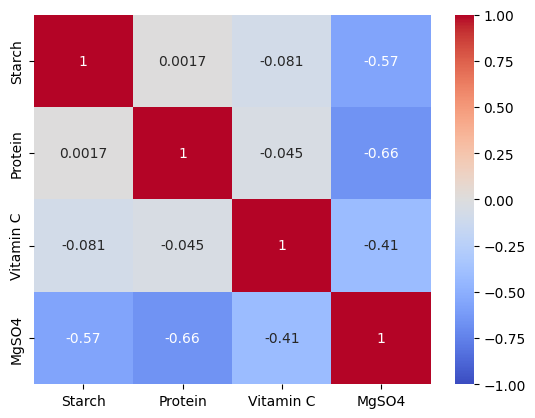

In [ ]:
df2 = pd.read_csv('best_lhs_ingredient_mixture.csv')
corr = df2.corr()
best_score = float('inf')
corr_score = (corr.where(~np.eye(corr.shape[0], dtype=bool))
                  .abs().sum().sum()) / (len(ingredient_cols)**2 - len(ingredient_cols))

# print(f"Iteration {iteration+1}: Average absolute correlation = {corr_score:.2f}")

if corr_score < best_score:
    best_score = corr_score
    best_corr = corr
    best_df_percent = df_percent.round(3).copy()

print(f"\n✅ Best correlation score: {best_score:.4f}")
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


🔬 Starch:
Shapiro-Wilk p-value = 0.7222
✅ Likely normal distribution


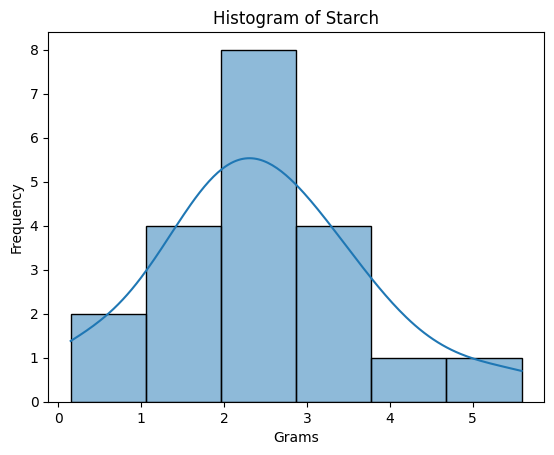


🔬 Protein:
Shapiro-Wilk p-value = 0.1277
✅ Likely normal distribution


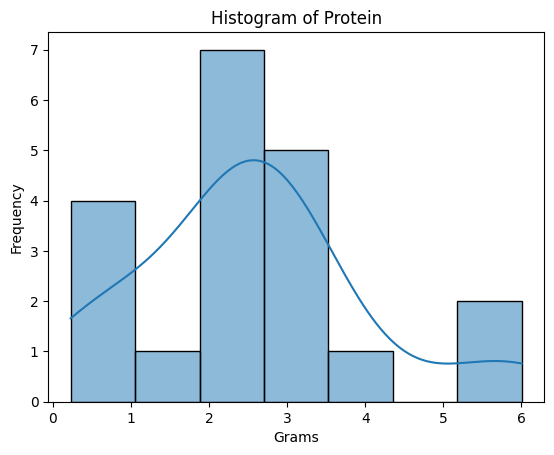


🔬 Vitamin C:
Shapiro-Wilk p-value = 0.6642
✅ Likely normal distribution


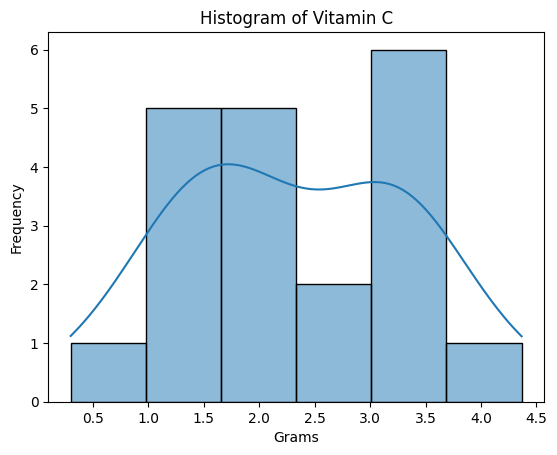

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

df_grams = pd.read_csv('grams_values.csv')
# For each ingredient, check normality
for col in df_grams.columns[:-1]:  # skip "Total (g)"
    data = df_grams[col]

    # Shapiro-Wilk test
    stat, p = shapiro(data)

    print(f"\n🔬 {col}:")
    print(f"Shapiro-Wilk p-value = {p:.4f}")
    if p > 0.05:
        print("✅ Likely normal distribution")
    else:
        print("❌ Not normally distributed")

    # Optional: plot histogram
    sns.histplot(data, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel("Grams")
    plt.ylabel("Frequency")
    plt.show()


/tmp/ipython-input-102-2225857953.py:30: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-102-2225857953.py:30: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


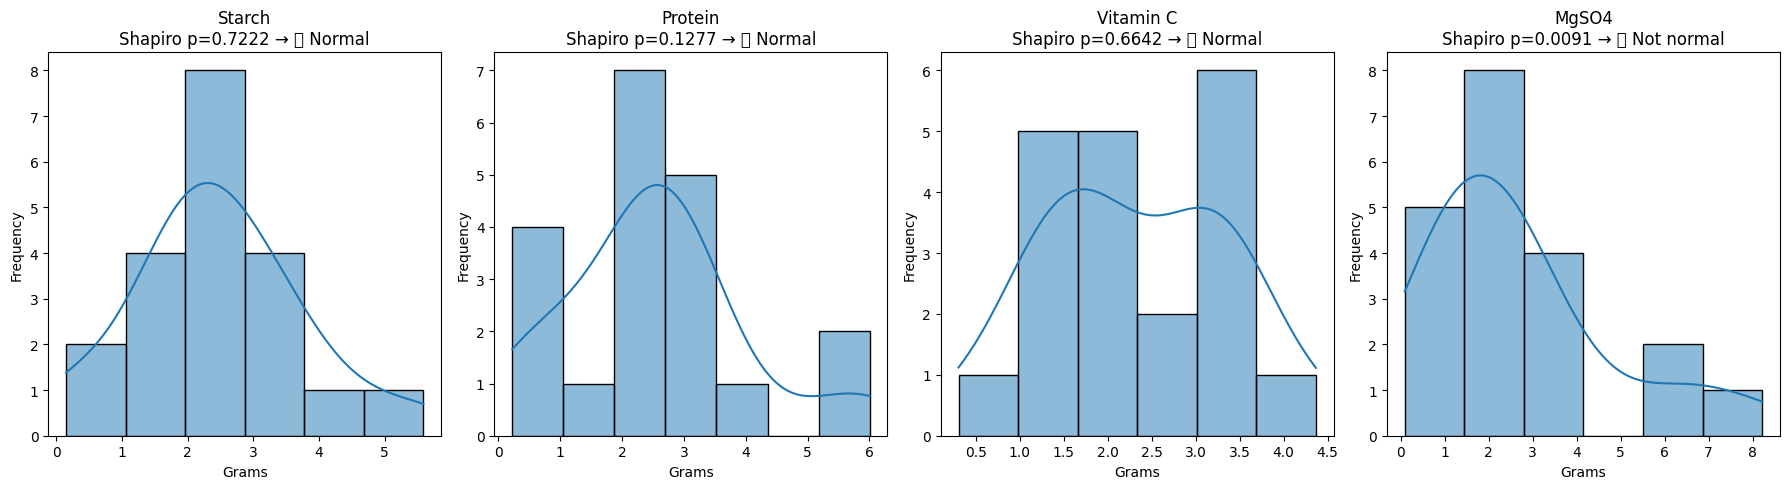

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your grams data
df_grams = pd.read_csv('grams_values.csv')

# Exclude total column if it exists
# ingredient_cols = [col for col in df_grams.columns if "Total" not in col]

# Set up subplots: 1 row, 3 plots (you can adjust cols later)
n_plots = 4
fig, axes = plt.subplots(1, n_plots, figsize=(18, 5))

# Only show the first 3 ingredients
for i, col in enumerate(ingredient_cols[:n_plots]):
    data = df_grams[col]

    # Shapiro-Wilk test
    stat, p = shapiro(data)
    result = "✅ Normal" if p > 0.05 else "❌ Not normal"

    # Plot
    sns.histplot(data, kde=True, ax=axes[i])
    axes[i].set_title(f"{col}\nShapiro p={p:.4f} → {result}")
    axes[i].set_xlabel("Grams")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
